在前两章中，我介绍了Note由 Pitch和组成的 Duration对象的概念 ，我们甚至在谱表上显示了一个音符并通过MIDI进行播放。但是，除非您要挑战Cage和Webern的音乐性最差的地位，否则您可能需要分析，操纵或创建多个Note。

Python具有处理多个对象的music21方式，并将这些方式扩展为更具音乐性。让我们先看看Python是如何做到的，然后再看如何music21扩展这些方式。（如果你已经编程了一下，或者特别是如果你有Python的经验，跳到下面创建的对象后流的部分note1， note2并note3在下面描述）。

假设您在高音谱号中间有两个音符，一个C和一个F＃。（如果使用升调的概念困扰您，请将第二个音符成为G）。

###  通过列出与多个对象工作

In [1]:
from music21 import *
note1 = note.Note("C4")
note2 = note.Note("F#4")

让我们通过修改其持续时间来将第一个音符变成半音符（默认情况下，所有Note对象都是四分音符）：

In [2]:
note1.duration.type = 'half'
note1.duration.quarterLength

2.0

In [3]:
note2.duration.quarterLength

1.0

打印每个note的step信息(这意味着没有任何八度或者升降调的信息)

In [4]:
print(note1.step)
print(note2.step)

C
F


In [5]:
note2.step

'F'

但是，假设您有三十个音符？然后键入“ print(noteX.step)”三十次会很痛苦。幸运的是，有一个解决方案：我们可以将每个note对象放入一个List内置的Python对象中，该对象存储了多个其他对象（例如Notes或Chords甚至是数字之类的东西）。要在Python中创建列表，请在要放入列表中的内容两边加上方括号（[]），以逗号分隔。让我们创建一个noteList包含note1和note2 的列表：

In [6]:
noteList = [note1, note2]
print(noteList)

[<music21.note.Note C>, <music21.note.Note F#>]


In [7]:

note3 = note.Note("B-2")
noteList.append(note3)

我们还可以使用以下 方法询问noteList其中的位置：


In [8]:
noteList.index(note2)

1

### 流介绍
Stream对象和它的子类(Score, Part, Measure)都是是用于music21对象的基本容器，如Note，Chord， Clef，TimeSignature 等等。

容器就像一个Python列表（或某些语言的数组）。

流中存储的对象通常是按时间间隔的；每个存储的对象都有一个偏移量，通常代表从流的开头起它有多少个四分音符。例如，在两个半音符的4/4小节中，第一个音符的偏移量为0.0，第二个音符的偏移量为2.0。

流还可以存储其他流，从而允许使用多种嵌套，有序和定时结构。这些存储的流也具有偏移量。因此，如果我们将两个4/4 Measure对象（Stream的子类）放入一个Part（也是Stream的一种类型）中，则第一个小节的偏移量为0.0，第二个小节的偏移量为4.0。

流的常用的子类包括 Score，Part，和 Measure。重要的是要记住，任何时候我们想要收集并包含一组music21对象时，都会将它们放入Stream中。流还可以用于不太常规的组织结构。我们经常会构建并传递短暂的临时Stream，因为这样做会打开各种各样的工具，用于提取，处理和操作Stream上的对象。例如，如果您仅查看任何小节拍2上的音符，则可能也希望将它们放入流中。

music21设计与其他音乐分析框架不同的一个关键特征是，一个music21对象可以同时存储（或更准确地说是引用）到多个Stream中。例如，Measure一个Part流中可能包含许多 流 。如果我们提取此部分的区域（使用measures()方法），我们将获得一个新的Stream，其中包含指定的小节和包含的注释。在这些提取的度量中，我们实际上并未创建新的注释；输出流仅具有对相同对象的引用。在此输出流中对Notes所做的更改将同时反映在源Part的Notes中。但是，存在一个限制：同一对象不应在Streams的一种层次结构中出现两次。例如，您不应该在同一小节的小节3和小节5中都放置一个音符对象–它可以出现在一个小节的小节3和另一小节的小节5中。（例如，如果您想在乐谱和编曲的原始版本中跟踪特定音符的上下文）。
### 创建简单的流
流中存储的对象称为元素，并且必须是某种Music21Object类型（不用担心，music21中的几乎所有内容都是Music21Object，例如Note，Chord，TimeSignature等）。

（如果要在Stream中放置一个不是Music21Object的对象，请将其放在中ElementWrapper。）

流与Python列表相似，因为它们按顺序保存各个元素。它们的不同之处在于，它们只能容纳 music21诸如Notes或Clef 对象之类的对象。但是它们更加智能和强大。

要创建Stream，您需要输入stream.Stream()并使用等号将其分配给变量。让我们称之为Stream stream1：

In [9]:
stream1 = stream.Stream()

请注意，就像（capital）Note对象生活在名为（lowercase）的模块中一样note，（capital）Stream对象生活在称为（lowercase）的模块中stream。变量名 stream1可以是大写或小写，但我倾向于使用小写的变量名（或我们使用的camelCase noteList）。

Streams最常见的用途是存储Notes。因此，我们可以Note使用的append方法添加上面创建的三个对象Stream：

In [42]:
stream[0]
#stream1.pop(0)

TypeError: 'module' object is not subscriptable

当然，要键入数百个可能会很麻烦Notes，因此我们也可以使用Stream方法 repeatAppend()添加同一Note的多个独立，唯一的副本。这将创建copy.deepcopy提供的对象（而不是引用）的独立副本（使用Python 函数）。

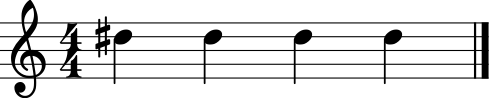

In [11]:
stream2 = stream.Stream()
n3 = note.Note('D#5') # octave values can be included in creation arguments
stream2.repeatAppend(n3, 4)
stream2.show()

让我们回到第一个流，我们可以看到它具有三个音符，使用的len功能和列表一样

In [12]:
len(stream1)

3

另外，我们可以使用show() 称为方法show('text')来查看Stream中的内容及其偏移量（此处的0.0是因为我们将其放在空流的末尾）。

In [13]:
stream1.show('text')

{0.0} <music21.note.Note C>
{2.0} <music21.note.Note F#>
{3.0} <music21.note.Note B->


如果您已经正确设置了环境，则使用musicxml参数调用show 可以打开Finale Reader或Sibelius或MuseScore或某些音乐记谱软件，并在下面显示注释。

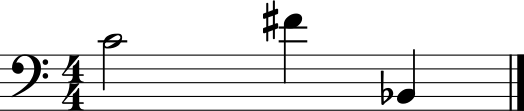

In [14]:
stream1.show()

### 访问流
我们现在可以更深层的研究流对象，让我们使用for循环对每个Note得到其step，不过我们不用列表了，用的是流：

In [15]:
for thisNote in stream1:
    print(thisNote.step)

C
F
B


和列表一样，我们可以通过下标进行内容的访问


In [16]:
stream1[-1].nameWithOctave

'B-2'

尽管stream和python的列表并不完全一样，但还是提供了很多与list相似的功能，比如可以用`index()`获得对象的索引，可以通过`pop()`和`append()`的方法删除和添加对象

In [17]:
note3Index = stream1.index(note3)
note3Index

2

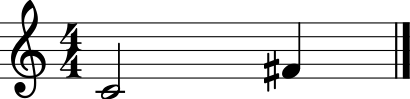

In [18]:
stream1.pop(note3Index)
stream1.show()

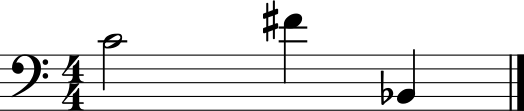

In [19]:
stream1.append(note3)
stream1.show()

### 使用`.getElementsByClass()`按类分割
我们还可以根据元素的类（对象类型），偏移范围或附加到元素的特定标识符来收集元素。基于元素的类从Stream收集元素提供了一种为所需类型的对象筛选Stream的方法。该getElementsByClass()方法遍历元素流，这些元素是提供的类的实例或子类。下面的示例先收集所有Note对象，然后收集 所有 Rest对象。最简单的方法是使用for带有.getElementsByClass()以下内容的循环：

In [20]:
for thisNote in stream1.getElementsByClass(note.Note):
    print(thisNote, thisNote.offset)

<music21.note.Note C> 0.0
<music21.note.Note F#> 2.0
<music21.note.Note B-> 3.0


如果不想使用`note.Note`，则可以传递字符串

In [21]:
for thisNote in stream1.getElementsByClass("Note"):
    print(thisNote, thisNote.offset)

<music21.note.Note C> 0.0
<music21.note.Note F#> 2.0
<music21.note.Note B-> 3.0


也可以传入一个类的列表，这样将会返回与列表类匹配的所有内容

In [22]:
for thisNote in stream1.getElementsByClass(["Note", "Rest"]):
    print(thisNote, thisNote.offset)

<music21.note.Note C> 0.0
<music21.note.Note F#> 2.0
<music21.note.Note B-> 3.0


由于没有note.Rest对象，因此与上面相同。那好吧…

流的还不还有一个属性`.notes`，其效果等于`.getElementsByClass(["Note", "Chord"])`

In [23]:
for thisNote in stream1.notes:
    print(thisNote)

<music21.note.Note C>
<music21.note.Note F#>
<music21.note.Note B->


`.notesAndRests`等效于 `.getElementsByClass(['Note', 'Chord', 'Rest'])`

In [24]:
for thisNote in stream1.notesAndRests:
    print(thisNote)

<music21.note.Note C>
<music21.note.Note F#>
<music21.note.Note B->


最后，有些不同。.pitches从对的调用开始.notes，但随后从Stream Note或ChordStream中返回所有音高的列表：

In [25]:
listOut = stream1.pitches
listOut

[<music21.pitch.Pitch C4>,
 <music21.pitch.Pitch F#4>,
 <music21.pitch.Pitch B-2>]

.getElementsByClass的结果不是流，但是您仍然可以调用.show()它：

In [26]:
sOut = stream1.getElementsByClass(note.Note)
sOut.show('text')

{0.0} <music21.note.Note C>
{2.0} <music21.note.Note F#>
{3.0} <music21.note.Note B->


不过如果你想确保自己得到的是流，可以用`.stream()`

In [27]:
sOut = stream1.getElementsByClass(note.Note).stream() # <-- different
sOut.show('text')

{0.0} <music21.note.Note C>
{2.0} <music21.note.Note F#>
{3.0} <music21.note.Note B->


### 使用`.getElementsByOffset()`分离出元素
使用`getElementsByOffset()`方法返回一个流的所有元素，这些元素落在单个偏移量或作为参数提供的两个偏移量范围内。在这两种情况下，均返回流。

In [28]:
sOut = stream1.getElementsByOffset(0)
len(sOut)

1

In [29]:
sOut[0]

<music21.note.Note C>

也可以在后面加一个`.stream()`确保自己拿到的是流

In [30]:
sOut = stream1.getElementsByOffset(0, 3).stream()
sOut.show('text')

{0.0} <music21.note.Note C>
{2.0} <music21.note.Note F#>
{3.0} <music21.note.Note B->


### 更多流操作
到目前为止，我们已经看到它Streams可以执行与列表相同的操作，但是它们可以执行更多操作吗？让我们使用`analyze`方法在流中获得Note的`ambitus`（即从最低音到最高音的范围）

In [31]:
stream1.analyze('ambitus')

<music21.interval.Interval A12>

让我们花点时间检查一下。我们的最低音符是note3（八度音阶2中的Bb），而我们的最高音符是note2（八度音阶4中的F#）。从Bb到其上的F#，是增加的第五位。增强的第五在八度表示增强的十二位。到目前为止，我们做得很好。（我们将在第18章中讨论其他可以分析的事情，Interval并在第15章中了解对象可以做什么）。

如前所述，当放置在Stream中时，Notes和其他元素也具有一个偏移量（存储在.offset中），该偏移量描述了它们从流的开头开始的位置。这些偏移值也以四分之一长度（QL）给出。

一旦note进入流中，我们就可以要求其中offset的 Notes（或其他任何东西）。该offset是说明相对于开始时的位置Stream在四分音符测量。所以note1的偏移量将为0.0，因为它位于Stream的开始处：

In [32]:
note1.offset

0.0

note2的偏移量将是2.0，因为note1是一个半音，相当于两个四分音：

In [33]:
note2.offset

2.0

并且note3，紧随四分音符之后的，note2将偏移3.0：

In [34]:
note3.offset

3.0

如果是嵌套的流的话，可以用如下递归的方式进行访问

In [35]:
def flatPrint(myList):              # 1
    for thing in myList:            # 2
        if isinstance(thing, list): # 3
            flatPrint(thing)        # 4
        else:                       # 5
            print(thing)            # 6